<a href="https://colab.research.google.com/github/luisantoniococa/STEM_day_presentation/blob/master/basic_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install tensorflow==0.12.1
import tensorflow as tf
print(tf.__version__)
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:463: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:464: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:465: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:466: FutureWarning: Passing (type, 1) or 

0.12.1


In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [0]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [0]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

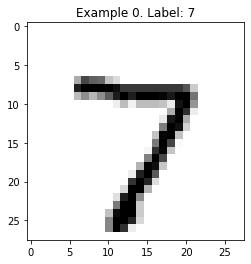

In [5]:

display(0)

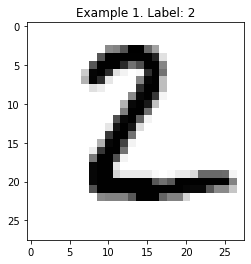

In [6]:
display(1)

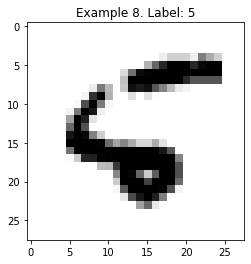

In [7]:
display(8)

In [8]:
print (len(data[0]))

784


In [9]:

feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

In [10]:
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


Predicted <generator object _as_iterable at 0x7fe6961f2150>, Label: 7
Predictions: [7]
Predicted [7], Label: 7


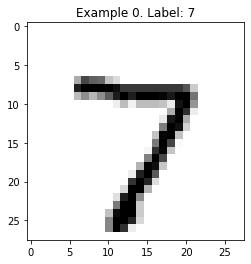

In [18]:


# here's one it gets right
print (f"Predicted {classifier.predict(test_data[0])}, Label: {test_labels[0]}")
display(0)
# prediction = classifier.predict(test_data[0])
new_samples = np.array([test_data[0]], dtype=float)

y = list(classifier.predict(new_samples, as_iterable=True))
print('Predictions: {}'.format(str(y)))

print ("Predicted %s, Label: %d" % (str(y), test_labels[0]))


float64
2
(28, 28)
Predictions: [3]
Predicted [3]


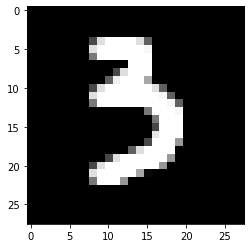

In [61]:
from PIL import Image

im = np.array(Image.open('3.png').convert("L"), dtype=float)
# im = im[:,:,0]

print(im.dtype)
# uint8

print(im.ndim)
# 3

print(im.shape)
# (512, 512, 3)
plt.imshow(im.reshape((28,28)), cmap=plt.cm.gray_r)

im = im.flatten().reshape(1,784)
im = ((im/255)-1)*-1
im.shape


prediction2 = list(classifier.predict(im, as_iterable=True))
print('Predictions: {}'.format(str(prediction2)))

print (f"Predicted {str(prediction2)}")
# print(((im/255)-1)*-1)

float64
2
(28, 28)
Predictions: [2]
Predicted [2]


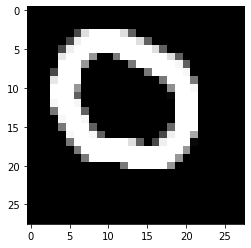

In [63]:
im2 = np.array(Image.open('0.png').convert("L"), dtype=float)
# im2 = im2[:,:,1]

print(im2.dtype)
# uint8

print(im2.ndim)
# 3

print(im2.shape)
# (512, 512, 3)
plt.imshow(im2.reshape((28,28)), cmap=plt.cm.gray_r)

im2 = im2.flatten().reshape(1,784)
im2 = ((im2/255)-1)*-1
im2.shape


prediction3 = list(classifier.predict(im2, as_iterable=True))
print('Predictions: {}'.format(str(prediction3)))

print (f"Predicted {str(prediction3)}")

Predictions: [8]
Predicted [8]


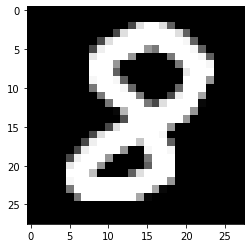

In [64]:
hope_is_8 = np.array(Image.open('8.png').convert("L"), dtype=float)

# print(im.dtype)
# # uint8

# print(im.ndim)
# # 3

# print(im.shape)
# # (512, 512, 3)
plt.imshow(hope_is_8.reshape((28,28)), cmap=plt.cm.gray_r)

hope_is_8 = hope_is_8.flatten().reshape(1,784)
hope_is_8 = ((hope_is_8/255)-1)*-1
hope_is_8.shape


is_it_8 = list(classifier.predict(hope_is_8, as_iterable=True))
print('Predictions: {}'.format(str(is_it_8)))

print (f"Predicted {str(is_it_8)}")